In [1]:
import pandas as pd
from lib.utils import plot_cake_mittente, plot_hist_mittente

In [2]:
data_string = "250713"
path = f'data/{data_string}_df_invoices_totali_per_fornitore.xlsx'
path_details = f'data/{data_string}_df_invoices_details.xlsx'
df_invoices_details = pd.read_excel(path_details)
df_invoices = pd.read_excel(path)

## Spese mensili

In [3]:
df_invoices['Mese_Fattura'] = pd.to_datetime(df_invoices['Data_Fattura']).dt.month
df_invoices_details['Mese_Fattura'] = pd.to_datetime(df_invoices_details['Data_Fattura']).dt.month

In [4]:
df_invoices.groupby('Mese_Fattura')['Importo_totale_doc'].sum()

Mese_Fattura
2    37085.00
4    41912.17
5    27471.55
6    27820.19
7     2145.09
Name: Importo_totale_doc, dtype: float64

In [5]:
df_invoices_details.groupby('Mese_Fattura')['Prezzo_ivato'].sum()

Mese_Fattura
2    37085.009200
4    42181.724000
5    27535.289766
6    27950.621740
7     2162.135080
Name: Prezzo_ivato, dtype: float64

## Grafici

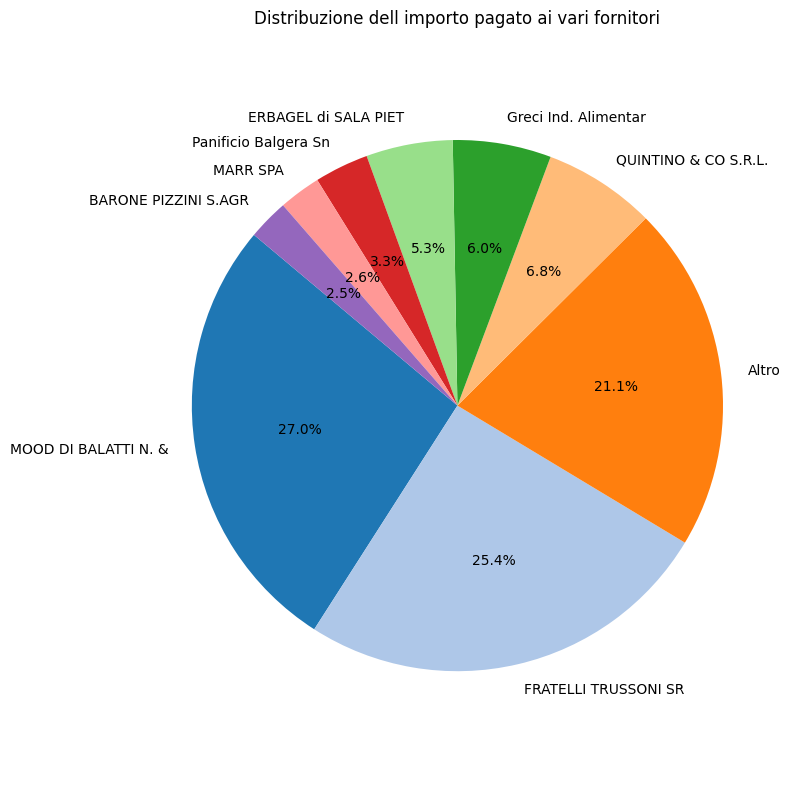

In [6]:
plot_cake_mittente(df_invoices_details)

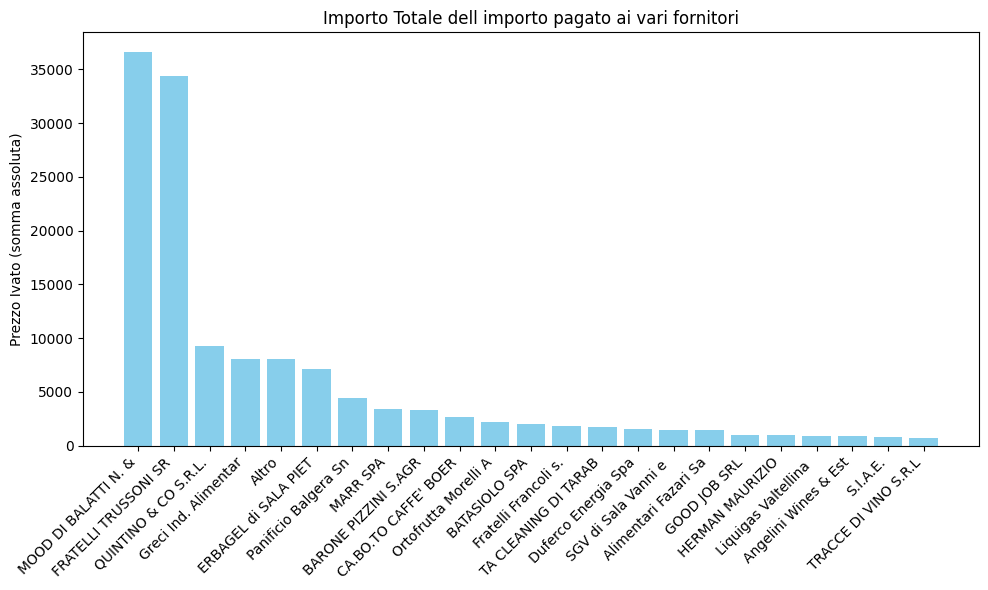

In [7]:
plot_hist_mittente(df_invoices_details)

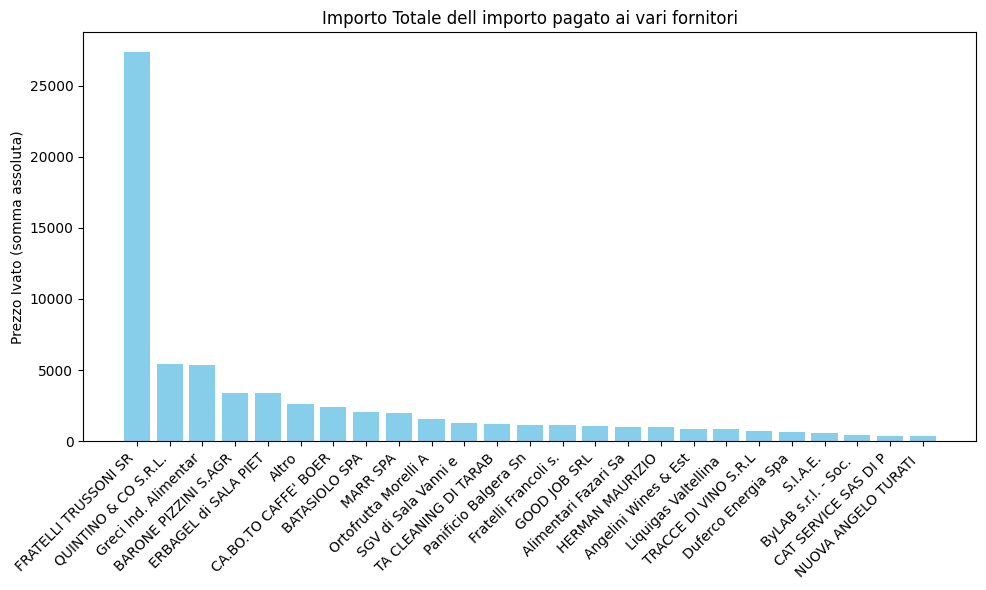

In [8]:
df_filtered = df_invoices_details.loc[df_invoices_details['Data_Fattura'].str.startswith(('2025-04', '2025-05'))]
plot_hist_mittente(df_filtered)

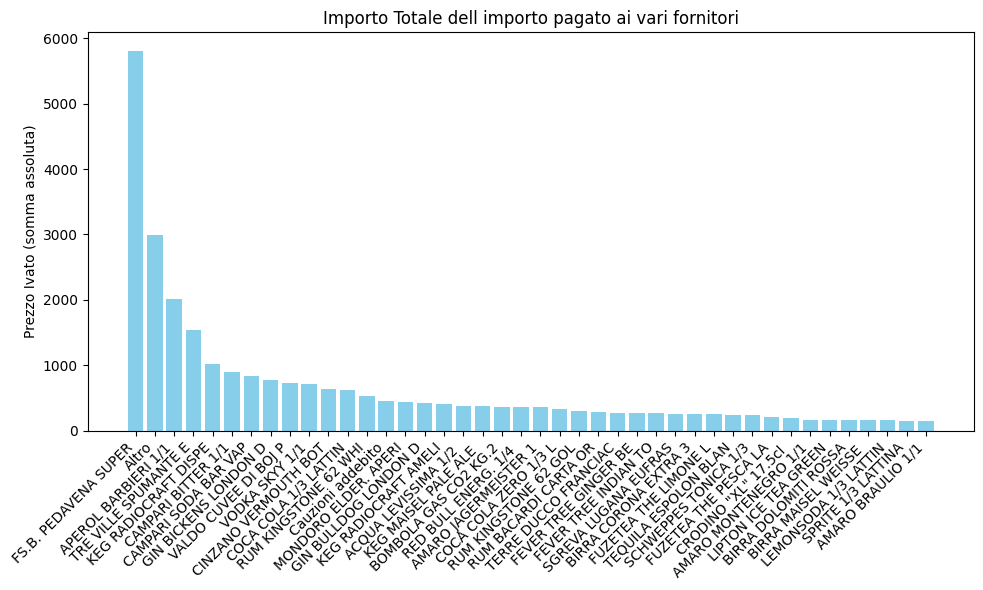

In [9]:
# Raggruppa e somma
df_filtered = df_invoices_details.loc[df_invoices_details['Data_Fattura'].str.startswith(('2025-04', '2025-05'))]
df_filtered = df_filtered.loc[df_filtered.Denominazione_Mittente == 'FRATELLI TRUSSONI SRL UNIPERSONALE -Soc. sogg.dir.e coord.La Trus Srl']

plot_hist_mittente(df_filtered, col_groupby='Descrizione')

In [10]:
# df_invoices.to_csv('data/df_invoices_02_05.csv', index=False)
# df_invoices_details.to_csv('data/df_invoices_details_02_05.csv', index=False)